In [1]:
from signal import signal
from matplotlib.offsetbox import HPacker
import scipy
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
pathsHPC = [path for path in Path('C:/Users/LENOVO/Desktop/sem7/internship/HomeCageHC').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('C:/Users/LENOVO/Desktop/sem7/internship/HomeCageHC').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
n_trials = len(pathsHPC)
time_halfbandwidth_product = 5
frequency_of_interest = list(range(10,30))

dataHPC = scipy.io.loadmat(pathsHPC[0])
dataPFC = scipy.io.loadmat(pathsPFC[0])

HPC=np.zeros(300000*39).reshape(300000,39)
PFC=np.zeros(300000*39).reshape(300000,39)

In [3]:
for i in range(n_trials-1): 
    # np.seterr(divide='ignore', invalid='ignore')
    # print(i)
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    current_dataHPC=current_dataHPC[0:300000]
    current_dataPFC=current_dataPFC[0:300000]
    n_time_samples = len(current_dataHPC)
    # print(n_time_samples)
    
    if n_time_samples == 300000:
        time = np.arange(0, n_time_samples)/sampling_frequency
        signal1 = np.zeros(n_time_samples)
        signal2 = np.zeros(n_time_samples)
        signal1 = current_dataHPC
        signal2 = current_dataPFC
        HPC[:,i,np.newaxis] = signal1
        PFC[:,i,np.newaxis] = signal2
        print(n_time_samples)
  

300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000
300000


In [5]:
print(HPC.shape)

signals = np.stack((HPC, PFC), axis=-1)

print(signals.shape)

m = Multitaper(
signals,
sampling_frequency=sampling_frequency,
time_halfbandwidth_product=time_halfbandwidth_product,
start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value = c.group_delay(
frequencies_of_interest=list(range(10,30)), frequency_resolution=m.frequency_resolution
)
print(delay)


(300000, 39)
(300000, 39, 2)
[[[        nan -0.18106588]
  [ 0.18106588         nan]]]


<BarContainer object of 2 artists>

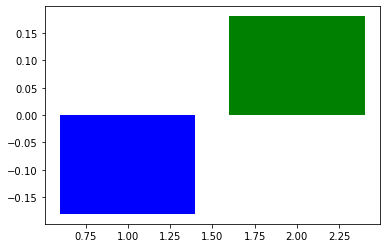

In [6]:
plt.bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)